In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as sklm
from sklearn.preprocessing import label_binarize

%pylab inline

MODEL_PATH    = '/Users/reneoctavio/Documents/leafsnap/finetune_caffe/'
DATASET_PATH  = '/Users/reneoctavio/Documents/leafsnap/'

CAT_FILE      = DATASET_PATH  + 'species.txt'
PREDICTIONS   = MODEL_PATH + 'prediction-top-5-test-50000.npy'
TRUE_VALUES   = MODEL_PATH + 'true-label-test-50000.npy'
PREDICTION_SC = MODEL_PATH + 'prediction-score-test-50000.npy'

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Read Species
sp_file = open(CAT_FILE, 'r')
dicCat = {}
listCat = []
for line in sp_file:
    ln = line.split()
    num = int(ln[len(ln) - 1])
    name = ' '.join(ln[0:(len(ln)-1)])
    dicCat[num] = name
for key, name in dicCat.items():
    listCat.append(name)
    
# Read True Values and Predictions
predictions = np.load(PREDICTIONS).astype(int)
true_values = np.load(TRUE_VALUES).astype(int)

print(predictions.shape)
print(true_values.shape)

(3240, 5)
(3240,)


In [3]:
# Plot Conf Mat function
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='None', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(listCat))
    plt.xticks(tick_marks, listCat, rotation=90)
    plt.yticks(tick_marks, listCat)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Use of complete test set
Calculation of precision and accuracy of the test set

In [4]:
print(sklm.precision_recall_fscore_support(true_values, predictions[:,0], average='weighted'))
print(sklm.accuracy_score(true_values, predictions[:,0]))
print(sklm.classification_report(true_values, predictions[:,0], target_names=listCat))

(0.96649509468231753, 0.96419753086419757, 0.96403549902749863, None)
0.964197530864
                              precision    recall  f1-score   support

              Abies concolor       0.96      1.00      0.98        26
          Abies nordmanniana       1.00      0.94      0.97        17
              Acer campestre       1.00      1.00      1.00        16
                Acer ginnala       1.00      0.94      0.97        16
                Acer griseum       1.00      1.00      1.00        13
                Acer negundo       1.00      1.00      1.00        24
               Acer palmatum       1.00      1.00      1.00        22
          Acer pensylvanicum       1.00      1.00      1.00        16
            Acer platanoides       1.00      0.86      0.92        14
         Acer pseudoplatanus       0.93      1.00      0.97        14
                 Acer rubrum       1.00      1.00      1.00        31
            Acer saccharinum       1.00      1.00      1.00        20
    

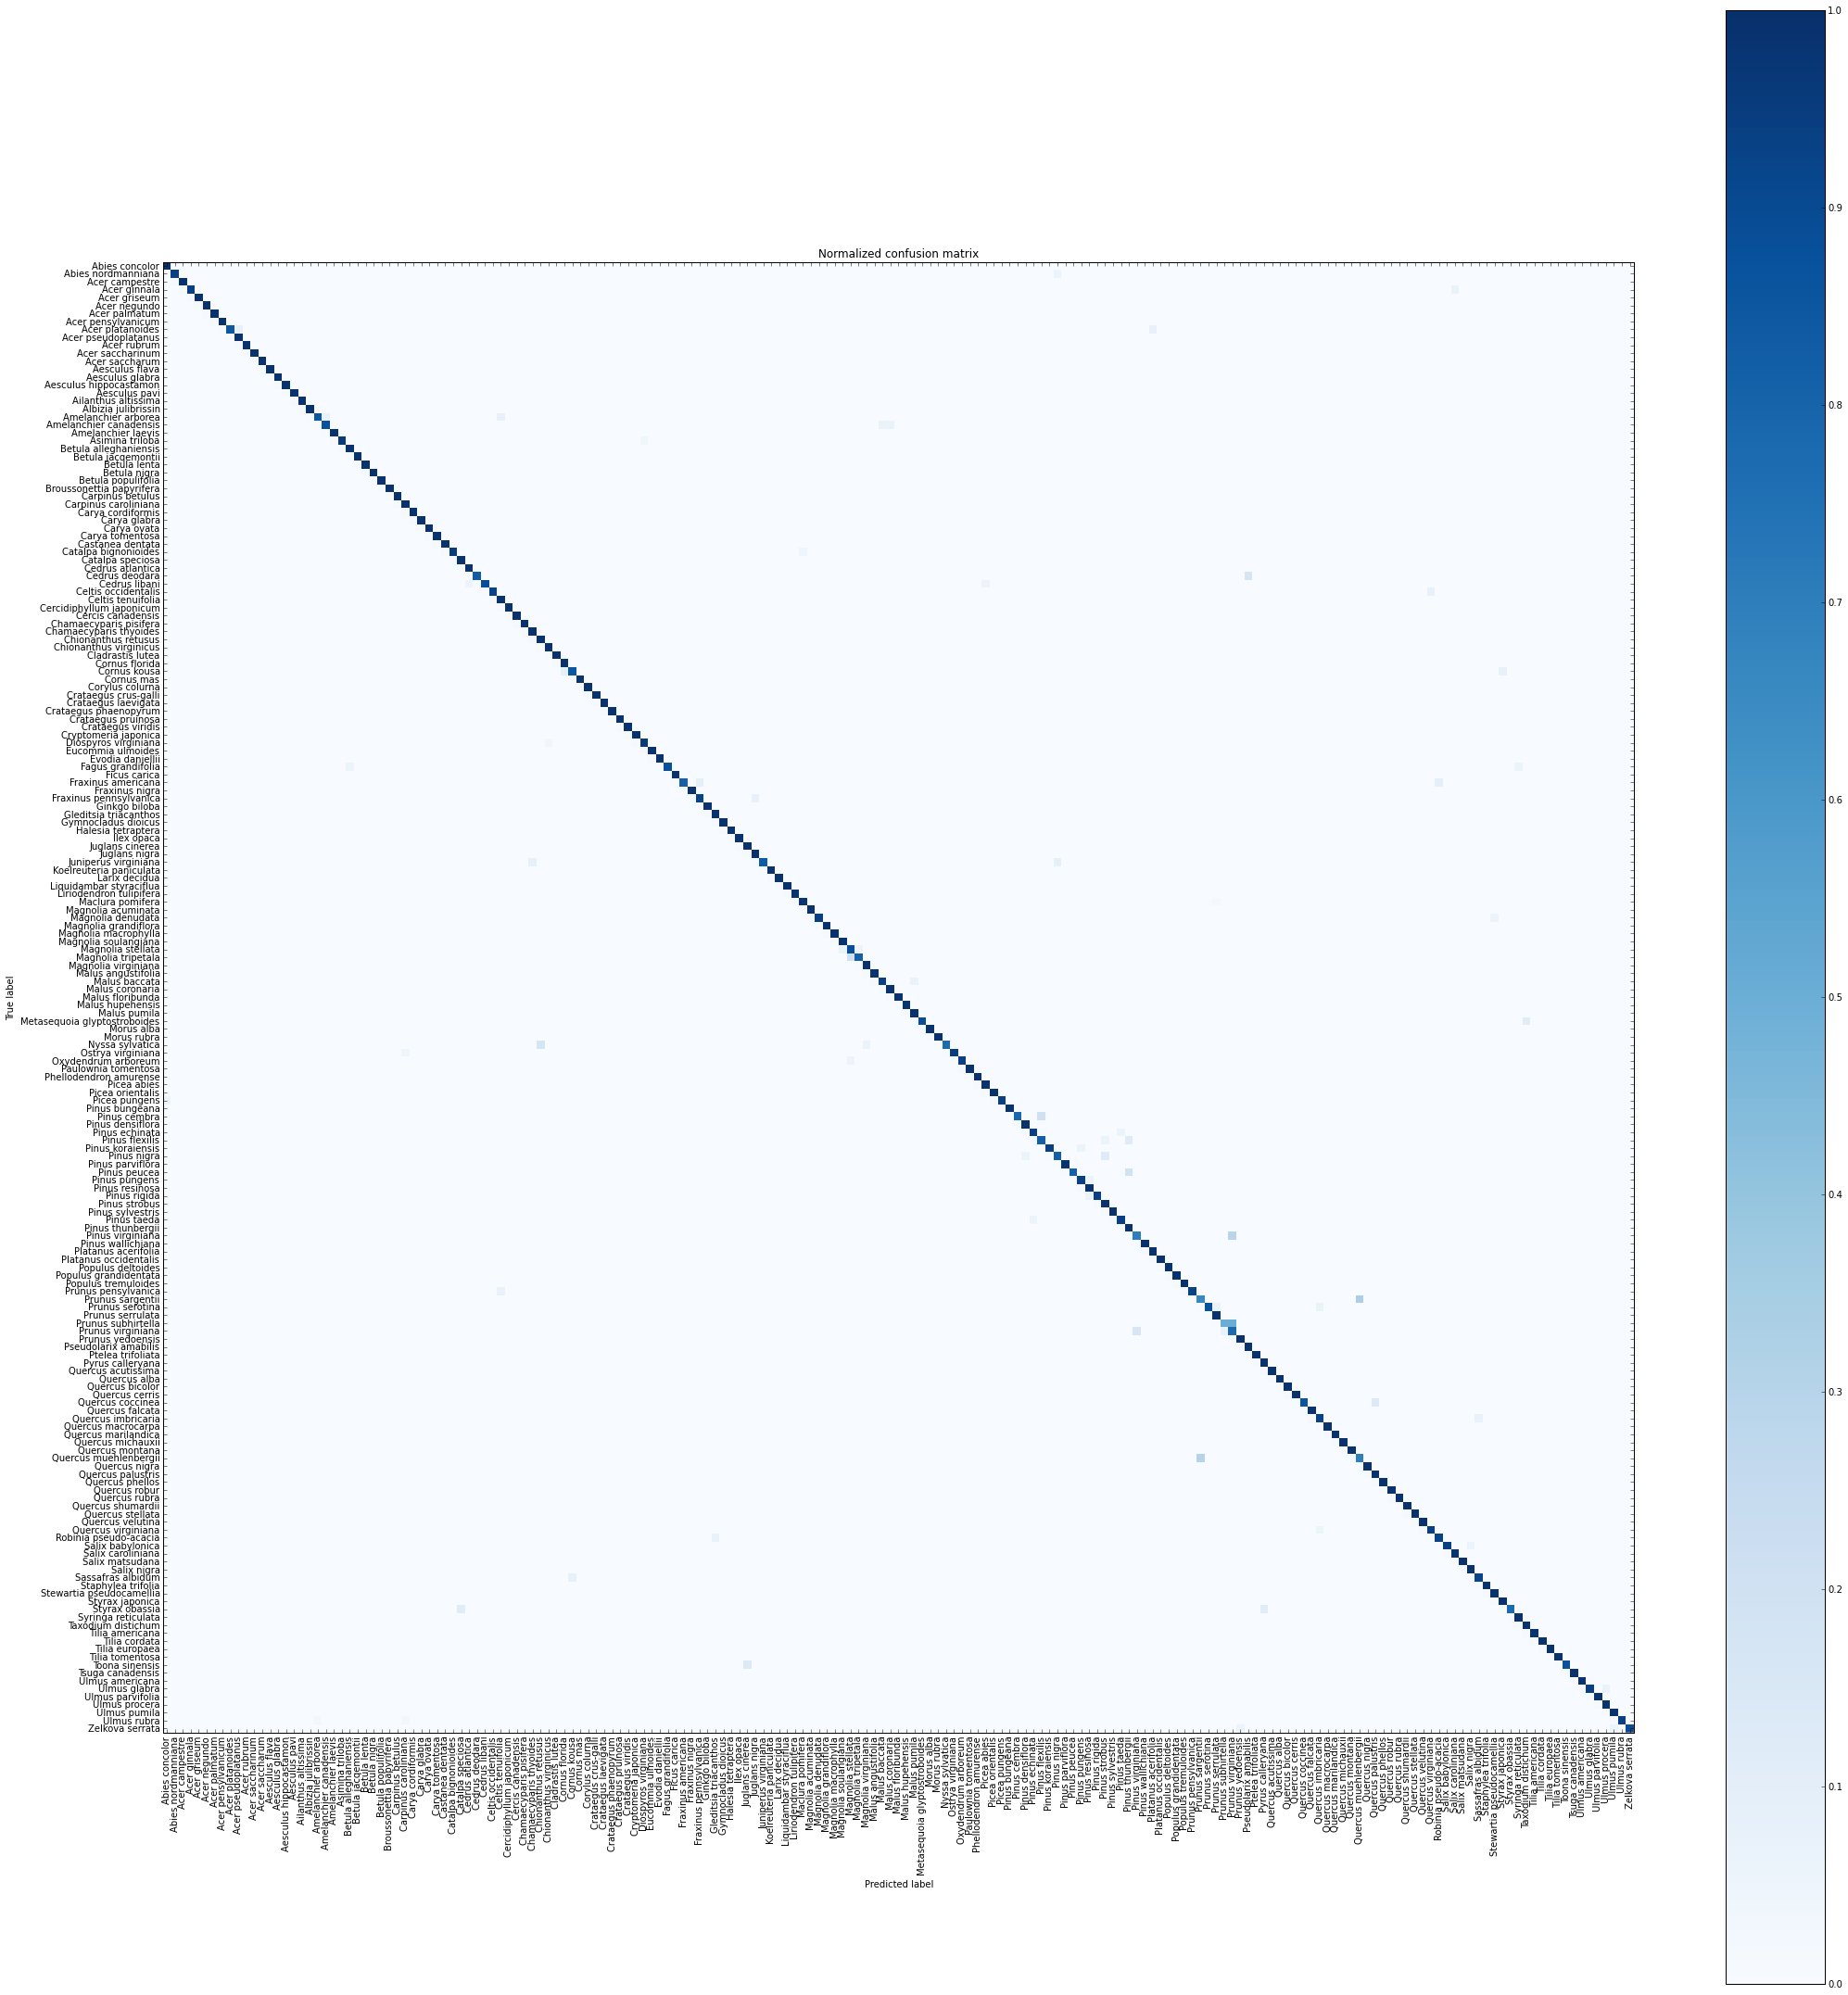

In [5]:
# Plot confusion matrix
pylab.rcParams['figure.figsize'] = (30.0, 30.0)
cm = sklm.confusion_matrix(true_values, predictions[:,0], np.arange(len(listCat)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()